In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [5]:
#creating dataset
X,Y=make_regression(n_samples=100,n_features=1,n_targets=1,noise=20,random_state=24)

#splitting dataset into X_train,y_train 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=24)

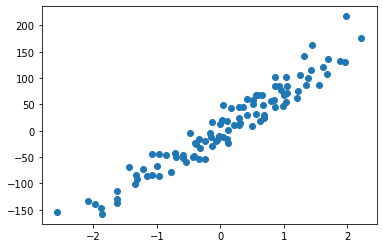

In [6]:
#visualise
plt.scatter(X,Y)
plt.show()

In [19]:
def parm_init(X):
    """
    input x: traninig data
    output : dictionary contaning coeeficinet """
    
    parmas={} #initialze dictioanry
    _,n_features=X.shape   #shape of trnaing data
    
    #initialising coee to zero
    parmas["W"]=np.zeros(n_features)
    parmas["b"]=0
    
    return parmas

In [20]:
def gradient_descent(X,y,parmas,alpha,n_iter):
    """
    X:traning data
    y : labels
    parmas: dictionary conataning random coeeficient
    alpha : model learning rate
    -----------------------------------------
    output : dictinary conataning optimized coeeficient """
    
    W=parmas["W"]
    b=parmas["b"]
    m=X.shape[0]   #number of traning instancesc
    
    for _ in range(n_iter):
        #prediction with ramdom weight
        y_pred=np.dot(X,W) + b
        #taking the partial derivative of coeeficient
        dW=(2/m)* np.dot(X.T,(y_pred-y))
        db=(2/m)*np.sum(y_pred-y)
        #update the coeeficient
        W-=alpha*dW
        b-=alpha*db
        
    parmas["W"]=W
    parmas["b"]=b
    return parmas

In [21]:
def train(X,y,alpha=0.01,n_iter=1000):
    """
    train the linear regression model with gradient descemt
    X: training data
    y: labels
    alpha: model learning rate
    n_iter : number of iterations
    ---------------------------------------------------------------
    output : dictionary contaning optimized coeeficinent
    
    """
    
    init_parmas=parm_init(X)
    parmas=gradient_descent(X,y,init_parmas,alpha,n_iter)
    return parmas 

In [33]:
def predict(X_test,parmas):
    """
    linear regression model tetsing on test data with optimized paramater"""
    
    y_pred=np.dot(X_test,parmas["W"] + parmas["b"])
    return y_pred

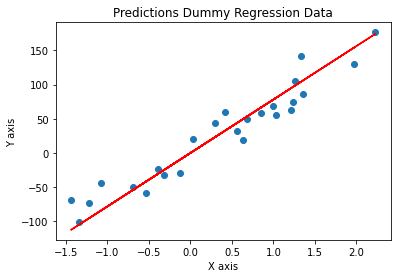

In [23]:
params = train(X_train, Y_train) # train model
y_preds = predict(X_test, params) # inference
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_preds, color="red")
plt.title("Predictions Dummy Regression Data")
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
sklearn_y_preds = lin_reg.predict(X_test)

In [35]:
print(f"My implementation: {np.sqrt(mean_squared_error(Y_test, y_preds))}") 

My implementation: 21.99286630786083


In [38]:
print(f" Sklearn implementation: {np.sqrt(mean_squared_error(Y_test, sklearn_y_preds))}")

 Sklearn implementation: 20.98610530754737
